Importing libaries and defining global constants

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename_1 = "be_rms_data.txt"
filename_2 = "be_rms_matter_data.txt"
R_0 = 1.25 # in fm

Reads the Be rms radius data from a text file and then plots it, also shows the expected rms for the R=r_0 * A^1/3 relation as well. Data taken from page 232 of https://www.sciencedirect.com/science/article/pii/S0146641012001081 (page 18 of the PDF)

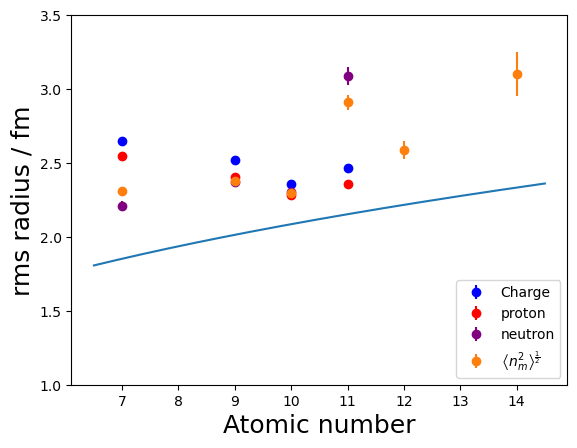

In [35]:
def reading_data(file_name):
    data = np.genfromtxt(file_name, dtype='float64', delimiter=',', skip_header=1)
    return data


def liquid_drop_formula(atomic_number, r_0=R_0):
    """
    Assumes a constant density 'liquid drop' model with <r^2> = 3/5 R^2, where R is the nuclear radius
    """
    R = r_0 * (atomic_number)**(1/3)
    return np.sqrt(3 / 5) * R


Be_data = reading_data(filename_1)
Be_matter_data = reading_data(filename_2)

x_data = np.linspace(6.5, 14.5, 1000)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(x_data, liquid_drop_formula(x_data))
ax.errorbar(Be_data[:, 0], Be_data[:, 1], Be_data[:, 2], fmt='o', color='blue', label='Charge')
ax.errorbar(Be_data[:, 0], Be_data[:, 3], Be_data[:, 4], fmt='o', color='red', label='proton')
ax.errorbar(Be_data[:, 0], Be_data[:, 5], Be_data[:, 6], fmt='o', color='purple', label='neutron')
ax.errorbar(Be_matter_data[:, 0], Be_matter_data[:, 1], yerr=Be_matter_data[:, 2], fmt='o', label=r'$\left\langle n_{m} ^{2} \right\rangle ^{\frac{1}{2}}$')
ax.set_xlabel('Atomic number', fontsize=18)
ax.set_ylabel('rms radius / fm', fontsize=18)
ax.set_ylim(1.0, 3.5)
plt.legend(loc='lower right')


plt.show()

This has in some sense raised more questions than I feel it answers. Both Be 11 and 14 are observed as Halo nuclei (But Be14 as a 2 neutron Halo?) and the R=r_0 A^1/3 for the 'standard' r_0 seems to be underpredicting (but might just be a small sample size of stable nuclei which lie above it anyway) 
From my reading so far,
   - Need to look at skin thickness more in order to differentate between halos and other exoctic nuclei.
   - find a defenition for what a halo is (maybe check chapter 1 of book again?)